### <p style="text-align: center;">120 years of Olympic History<br>Athletes and Results</p>
#### <p style="text-align: center;">DSC 530 – Exploratory Data Analysis<br/>Fall 2020<br/> Manish Kalkar</p>
### <p style="text-align: center;">Final Project Code - EDA</p>

In [1]:
# Load the libraries
import pandas as pd
import seaborn as sns

# Data Load - Load the data with Pandas, and check its size
olympic_df = pd.read_csv('athlete_events.csv')
olympic_df.shape

(271116, 15)

In [2]:
# List the columns
list(olympic_df)

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [3]:
# Display the data - First five rows
olympic_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Missing data / Null values
def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    return (100.0*empty_values)/row_count

In [5]:
# Missing data percentage
NaN_percent(olympic_df, 'Height')

22.193821095029435

In [6]:
# Missing data percentage by column
for i in list(olympic_df):
    print(i +': ' + str(NaN_percent(olympic_df,i))+'%')

ID: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 3.49444518213606%
Height: 22.193821095029435%
Weight: 23.19118015904631%
Team: 0.0%
NOC: 0.0%
Games: 0.0%
Year: 0.0%
Season: 0.0%
City: 0.0%
Sport: 0.0%
Event: 0.0%
Medal: 85.3262072323286%


In [7]:
# How many athletes won a medal since 1900?
total_rows = olympic_df.shape[0]
unique_athletes = len(olympic_df.Name.unique())
medal_winners = len(olympic_df[olympic_df.Medal.fillna('None')!='None'].Name.unique())

"{0} {1} {2}".format(total_rows, unique_athletes, medal_winners)

'271116 134732 28202'

In [8]:
# See Medal distribution
print(olympic_df[olympic_df.Medal.fillna('None')!='None'].Medal.value_counts())

# How many medals have been earned throughout 120 years?
olympic_df[olympic_df.Medal.fillna('None')!='None'].shape[0]

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


39783

In [9]:
# Medal distribution by countries - Number of medals by each country
team_medal_count = olympic_df.groupby(['Team','Medal']).Medal.agg('count')

# order them by quantity
team_medal_count = team_medal_count.reset_index(name='count').sort_values(['count'], ascending=False)

# Show the first 10 rows
team_medal_count.head(10)

,Team,Medal,count
726,United States,Gold,2474
727,United States,Silver,1512
725,United States,Bronze,1233
627,Soviet Union,Gold,1058
628,Soviet Union,Silver,716
263,Germany,Gold,679
262,Germany,Bronze,678
626,Soviet Union,Bronze,677
264,Germany,Silver,627
278,Great Britain,Silver,582


In [10]:
# Function Definition - Medal distribution by countries - Continued
def get_country_stats(country):
    return team_medal_count[team_medal_count.Team==country]

In [11]:
# Medal distribution by countries - Argentina
get_country_stats('Argentina')

,Team,Medal,count
13,Argentina,Gold,91
12,Argentina,Bronze,91
14,Argentina,Silver,84


In [12]:
# Medal distribution by countries - Mexico
get_country_stats('Mexico')

,Team,Medal,count
444,Mexico,Bronze,51
445,Mexico,Gold,30
446,Mexico,Silver,26


In [13]:
# Medal distribution by countries - China
get_country_stats('China')

,Team,Medal,count
126,China,Silver,325
125,China,Gold,308
124,China,Bronze,268


In [14]:
# Participation by Country - India
olympic_df[olympic_df.Team=='India'].Year.unique()

array([1928, 1984, 1988, 1992, 1996, 2004, 2008, 2016, 1948, 1980, 1956,
       2006, 1964, 1976, 1932, 1936, 2000, 1952, 1960, 2012, 1972, 1920,
       1968, 1924, 2014, 1998, 2002, 2010, 1900], dtype=int64)

In [15]:
# Men and Women participation
unique_women = len(olympic_df[olympic_df.Sex=='F'].Name.unique())
unique_men = len(olympic_df[olympic_df.Sex=='M'].Name.unique())
women_medals = olympic_df[olympic_df.Sex=='F'].Medal.count()
men_medals = olympic_df[olympic_df.Sex=='M'].Medal.count()

print("{} {} {} {} ".format(unique_women, unique_men, women_medals, men_medals ))

olympic_df[olympic_df.Sex=='F'].Year.min()

33808 100979 11253 28530 


1900

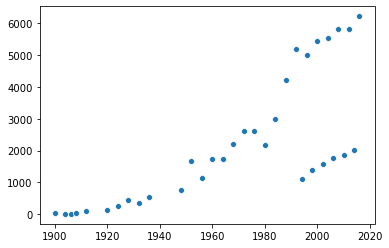

In [16]:
# Women participation – Time Series Analysis – Scatter Plot
female = olympic_df[olympic_df.Sex=='F']
year_count = female.groupby('Year').agg('count')
years = list(year_count.index)
counts =  list(year_count.Name)
sns.scatterplot(x = years, y = counts)

(<matplotlib.axes._subplots.AxesSubplot at 0x18080e333a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18080e333a0>)

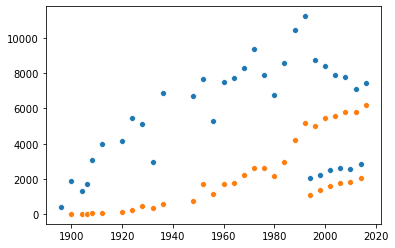

In [17]:
# Men vs. Women participation – Time Series Analysis – Scatter Plot
f_year_count = olympic_df[olympic_df.Sex=='F'].groupby('Year').agg('count').Name
m_year_count = olympic_df[olympic_df.Sex=='M'].groupby('Year').agg('count').Name
(sns.scatterplot(data= m_year_count),
 sns.scatterplot(data =f_year_count))

In [18]:
# Athletes by sport
olympic_df.Sport.value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

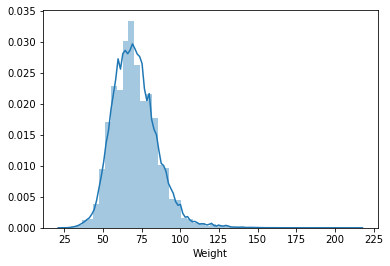

In [19]:
# Weight of Athletes – Histogram with Analytical Distribution
weight = olympic_df['Weight']
sns.distplot(weight.dropna())

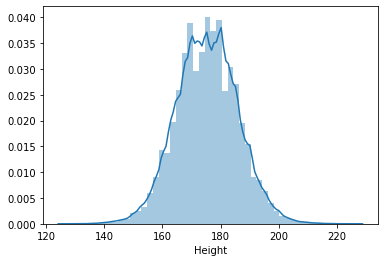

In [20]:
# Height of Athletes – Histogram with Analytical Distribution
height = olympic_df['Height']
sns.distplot(height.dropna())

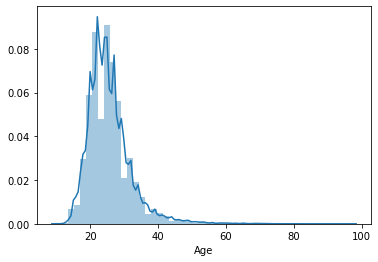

In [21]:
# Age of Athletes – Histogram with Analytical Distribution
age = olympic_df['Age']
sns.distplot(age.dropna())

In [22]:
# What sports have the heaviest and tallest players, and the lightest or shortest? - MALE
male_df = olympic_df[olympic_df.Sex=='M']
sport_weight_height_metrics = male_df.groupby(['Sport'])['Weight','Height'].agg(['min','max','mean'])

sport_weight_height_metrics.Weight.dropna().sort_values('mean', ascending=False)[:5]

<ipython-input-22-3489892ef954>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sport_weight_height_metrics = male_df.groupby(['Sport'])['Weight','Height'].agg(['min','max','mean'])


,min,max,mean
Sport,,,
Tug-Of-War,75.0,118.0,95.615385
Basketball,59.0,156.0,91.683529
Rugby Sevens,65.0,113.0,91.006623
Bobsleigh,55.0,145.0,90.387385
Beach Volleyball,62.0,110.0,89.512821


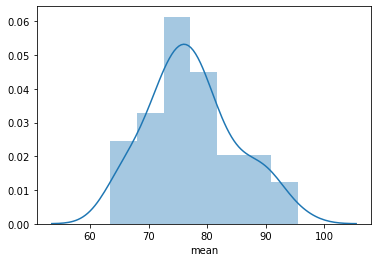

In [23]:
# Histogram - Mean weight and Mean height for each sport
sns.distplot(sport_weight_height_metrics.Weight.dropna()['mean'])

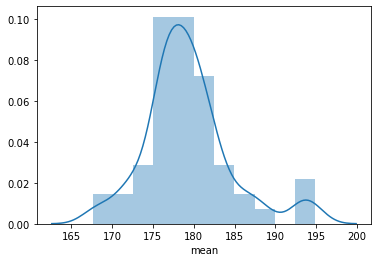

In [24]:
# Histogram - Mean weight and Mean height for each sport
sns.distplot(sport_weight_height_metrics.Height.dropna()['mean'])

In [25]:
# What sports have the heaviest and tallest players, and the lightest or shortest? - FEMALE
female_df = olympic_df[olympic_df.Sex=='F']
sport_weight_height_metrics = female_df.groupby(['Sport'])['Weight','Height'].agg(
  ['min','max','mean'])

sport_weight_height_metrics.Weight.dropna().sort_values('mean', ascending=False)[:10]

<ipython-input-25-ffbdd81e9666>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sport_weight_height_metrics = female_df.groupby(['Sport'])['Weight','Height'].agg(


,min,max,mean
Sport,,,
Basketball,50.0,128.0,73.685170
Bobsleigh,55.0,95.0,72.804196
Water Polo,50.0,104.0,70.180328
Rowing,39.0,97.0,70.102214
Volleyball,30.0,98.0,69.333779
Handball,48.0,105.0,68.876851
Beach Volleyball,55.0,81.0,68.350943
Weightlifting,47.0,167.0,67.724622
Softball,45.0,109.0,67.471655


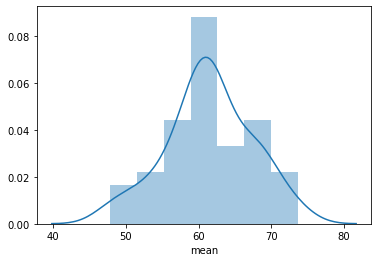

In [26]:
# Histogram - Mean weight and Mean height for each sport
sns.distplot(sport_weight_height_metrics.Weight.dropna()['mean'])

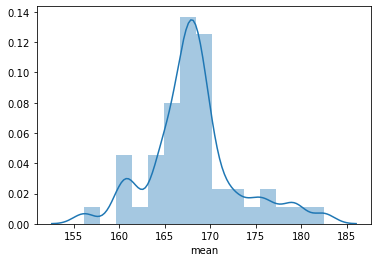

In [27]:
# Histogram - Mean weight and Mean height for each sport
sns.distplot(sport_weight_height_metrics.Height.dropna()['mean'])

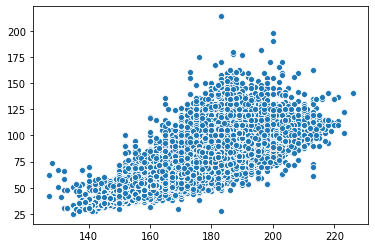

In [28]:
# Distribution between Height and Weight  – Scatter Plot
height = olympic_df.Height.values.tolist()
weight = olympic_df.Weight.values.tolist()

data = {'x':height, 'y':weight}
sns.scatterplot(data=data, x = 'x', y='y')

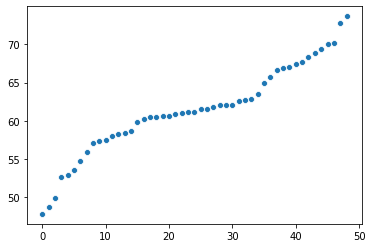

In [29]:
# Scatter plot to identify the outliers
means = list(sport_weight_height_metrics.Weight.dropna()['mean'])
sports = list(sport_weight_height_metrics.Weight.dropna().index)
plot_data = sorted(zip(sports, means), key = lambda x:x[1])
plot_data_dict = {
    'x' : [i for i, _ in enumerate(plot_data)],
    'y' : [v[1] for i, v in enumerate(plot_data)],
    'group' :  [v[0] for i, v in enumerate(plot_data)]
}
sns.scatterplot(data = plot_data_dict, x = 'x' , y = 'y')

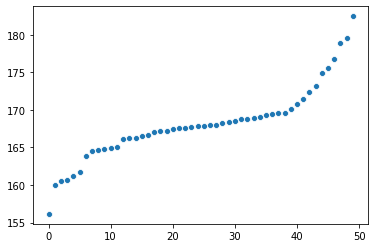

In [30]:
# Scatter plot to identify the outliers
means = list(sport_weight_height_metrics.Height.dropna()['mean'])
sports = list(sport_weight_height_metrics.Height.dropna().index)
plot_data = sorted(zip(sports, means), key = lambda x:x[1])
plot_data_dict = {
    'x' : [i for i, _ in enumerate(plot_data)],
    'y' : [v[1] for i, v in enumerate(plot_data)],
    'group' :  [v[0] for i, v in enumerate(plot_data)]
}
sns.scatterplot(data = plot_data_dict, x = 'x' , y = 'y')

In [31]:
# Sports that have the lightest players
print('lightest:')
for sport,weight in plot_data[:5]:
    print(sport + ': ' + str(weight))

lightest:
Gymnastics: 156.14332460732984
Art Competitions: 160.0
Weightlifting: 160.4673913043478
Figure Skating: 160.61084905660377
Diving: 161.1736040609137


In [32]:
# Sports that have the heaviest players
print('\nheaviest:')    
for sport,weight in plot_data[-5:]:
    print(sport + ': ' + str(weight))


heaviest:
Water Polo: 175.56352459016392
Rowing: 176.77107866227038
Beach Volleyball: 178.86666666666667
Volleyball: 179.49498327759198
Basketball: 182.45483613109513


In [33]:
# Sports that have the shortest players
print('shortest:')
for sport,height in plot_data[:5]:
    print(sport + ': ' + str(height))

shortest:
Gymnastics: 156.14332460732984
Art Competitions: 160.0
Weightlifting: 160.4673913043478
Figure Skating: 160.61084905660377
Diving: 161.1736040609137


In [34]:
# # Sports that have the tallest players
print('\ntallest:')    
for sport,height in plot_data[-5:]:
    print(sport + ': ' + str(height))


tallest:
Water Polo: 175.56352459016392
Rowing: 176.77107866227038
Beach Volleyball: 178.86666666666667
Volleyball: 179.49498327759198
Basketball: 182.45483613109513


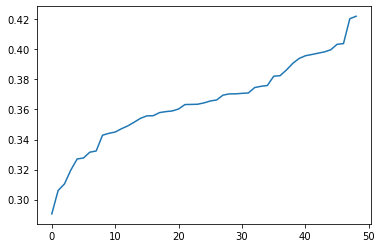

In [35]:
# Build (weight/height) per each sport
mean_heights = sport_weight_height_metrics.Height.dropna()['mean']
mean_weights = sport_weight_height_metrics.Weight.dropna()['mean']
avg_build = mean_weights/mean_heights
avg_build.sort_values(ascending = True)
builds = list(avg_build.sort_values(ascending = True))

plot_dict = {'x':[i for i,_ in enumerate(builds)],'y':builds}
sns.lineplot(data=plot_dict, x='x', y='y')

In [36]:
avg_build.sort_values(ascending=False)

Sport
Weightlifting                0.422046
Bobsleigh                    0.420392
Basketball                   0.403854
Judo                         0.403370
Water Polo                   0.399743
Softball                     0.398309
Rugby Sevens                 0.397456
Rowing                       0.396571
Luge                         0.395757
Handball                     0.393942
Ice Hockey                   0.390661
Volleyball                   0.386271
Canoeing                     0.382475
Beach Volleyball             0.382133
Golf                         0.375956
Curling                      0.375407
Alpine Skiing                0.374596
Archery                      0.370969
Shooting                     0.370716
Speed Skating                0.370385
Sailing                      0.370344
Wrestling                    0.369538
Boxing                       0.366327
Badminton                    0.365631
Hockey                       0.364369
Snowboarding                 0.363469
Footba

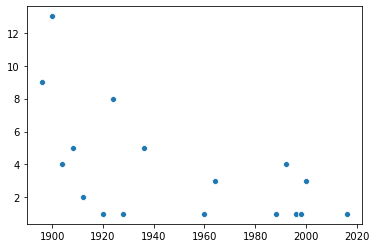

In [37]:
# New sports introduced each year in Olympics
sport_min_year = male_df.groupby('Sport').Year.agg(['min','max'])['min'].sort_values('index')
year_count = {}
for y in sport_min_year:
    try:
        year_count[y] += 1
    except:
        year_count[y] = 1
year = [k for k,v in year_count.items()]
new_sports = [v for k,v in year_count.items()]

data = {'x':year, 'y':new_sports}
sns.scatterplot(data=data, x = 'x', y='y')

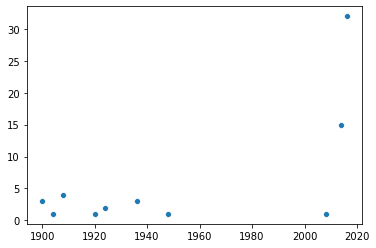

In [38]:
# Disapproved sports from Olympics
sport_max_year = male_df.groupby('Sport').Year.agg(['min','max'])['max'].sort_values('index')
year_count = {}
for y in sport_max_year:
    try:
        year_count[y] += 1
    except:
        year_count[y] = 1
year = [k for k,v in year_count.items()]
deprecated_sports = [v for k,v in year_count.items()]

data = {'x':year, 'y':deprecated_sports}
sns.scatterplot(data=data, x = 'x', y='y')

In [39]:
# Sports with minimum participation
sport_min_year[sport_min_year >1936]

Sport
Biathlon                     1960
Luge                         1964
Volleyball                   1964
Judo                         1964
Table Tennis                 1988
Baseball                     1992
Short Track Speed Skating    1992
Badminton                    1992
Freestyle Skiing             1992
Beach Volleyball             1996
Snowboarding                 1998
Taekwondo                    2000
Trampolining                 2000
Triathlon                    2000
Rugby Sevens                 2016
Name: min, dtype: int64

In [40]:
# # Sports with maximum participation
sport_max_year[sport_max_year <2000]

Sport
Basque Pelota          1900
Croquet                1900
Cricket                1900
Roque                  1904
Jeu De Paume           1908
Racquets               1908
Motorboating           1908
Lacrosse               1908
Tug-Of-War             1920
Rugby                  1924
Military Ski Patrol    1924
Polo                   1936
Aeronautics            1936
Alpinism               1936
Art Competitions       1948
Name: max, dtype: int64